<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/tutorial_contour_quiver_3D_physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Tutorial: Contour, Quiver, and 3D Plots (with Physics Examples)

Este notebook contém o conteúdo básico e **exemplos com contexto de física**: eletrostática (campo e equipotenciais), magnetostática (fio retilíneo infinito) e interferência de ondas.

**Requisitos**: `numpy`, `matplotlib`

## Setup

In [1]:
# All code comments in English
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

np.random.seed(42)
%matplotlib inline


## 1) Contour and Filled Contour (Warm-up)

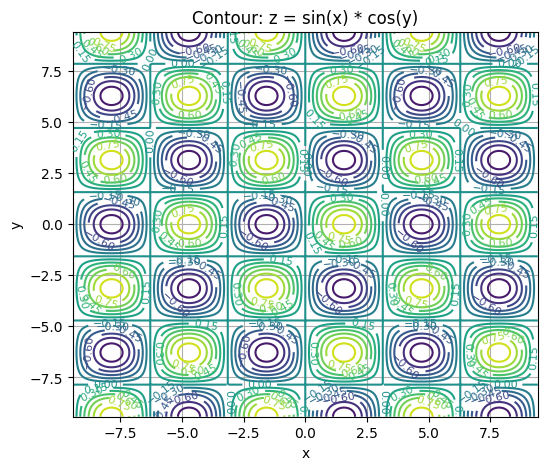

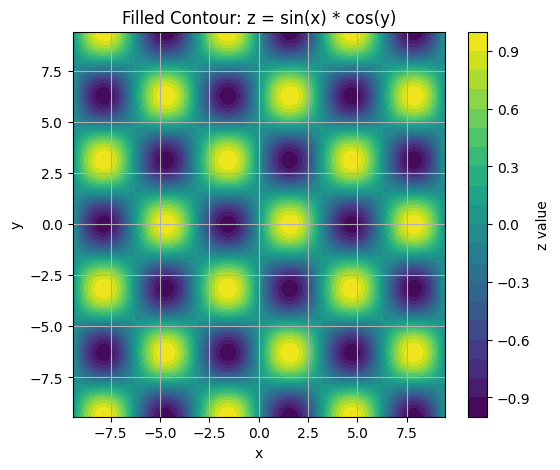

In [2]:
# Warm-up scalar field
x = np.linspace(-3*np.pi, 3*np.pi, 200)
y = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

plt.figure(figsize=(6,5))
cs = plt.contour(X, Y, Z, levels=15)
plt.clabel(cs, inline=True, fontsize=8)
plt.title('Contour: z = sin(x) * cos(y)')
plt.xlabel('x'); plt.ylabel('y'); plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
cf = plt.contourf(X, Y, Z, levels=20)
plt.colorbar(cf, label='z value')
plt.title('Filled Contour: z = sin(x) * cos(y)')
plt.xlabel('x'); plt.ylabel('y'); plt.grid(True)
plt.show()

## 2) Vector Fields (Warm-up Quiver)

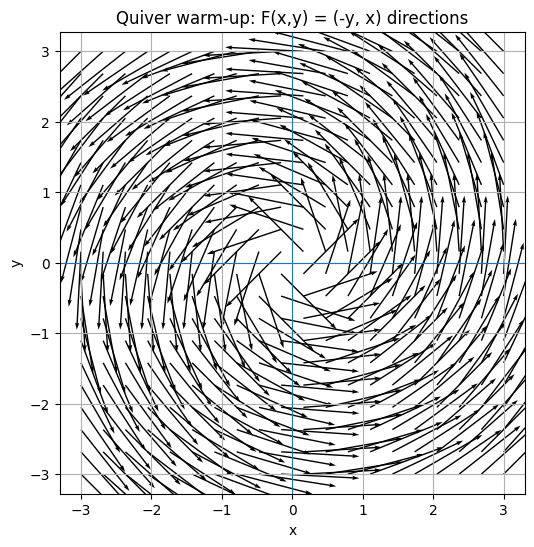

In [3]:
# Simple rotational field: F = (-y, x)
n = 20
xq = np.linspace(-3, 3, n)
yq = np.linspace(-3, 3, n)
Xq, Yq = np.meshgrid(xq, yq)
U = -Yq
V = Xq
mag = np.sqrt(U*U + V*V)
mag[mag == 0] = 1.0
U = U / mag
V = V / mag

plt.figure(figsize=(6,6))
plt.quiver(Xq, Yq, U, V, angles='xy', scale_units='xy', scale=0.9)
plt.axhline(0, linewidth=0.8); plt.axvline(0, linewidth=0.8)
plt.title('Quiver warm-up: F(x,y) = (-y, x) directions')
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal'); plt.grid(True)
plt.show()

## 3) 3D Plots (Warm-up)

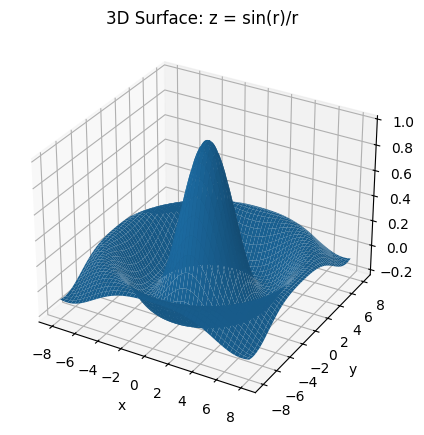

In [4]:
# 3D surface: z = sin(r)/r
xs = np.linspace(-8, 8, 200)
ys = np.linspace(-8, 8, 200)
XS, YS = np.meshgrid(xs, ys)
R = np.sqrt(XS*XS + YS*YS)
Zs = np.sin(R)
Zs[R != 0] = Zs[R != 0] / R[R != 0]
Zs[R == 0] = 1.0

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XS, YS, Zs)
ax.set_title('3D Surface: z = sin(r)/r')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

---
## Physics Examples
A seguir, exemplos concisos com contexto físico: **Eletrostática (dipolo)**, **Magnetostática (fio infinito)** e **Interferência de ondas (duas fontes)**.

### 4) Electrostatics: Dipole Equipotentials and Electric Field

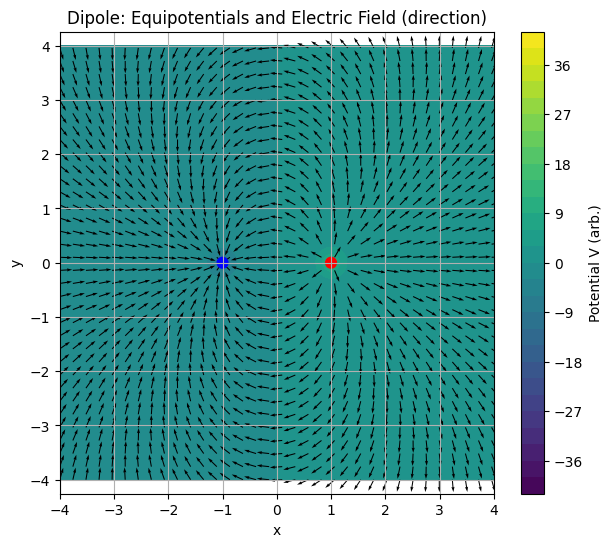

In [5]:
# Dipole: two charges +q and -q at (+a,0) and (-a,0)
# We plot equipotentials (contour) and E field (quiver)
a = 1.0
q = 1.0
eps = 1e-6  # to avoid singularities

x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 200)
X, Y = np.meshgrid(x, y)

# Distances to charges
r_plus = np.sqrt((X - a)*(X - a) + Y*Y)
r_minus = np.sqrt((X + a)*(X + a) + Y*Y)

# Potential (k set to 1): V = q/r_plus - q/r_minus
V = q/(r_plus + eps) - q/(r_minus + eps)

# Electric field: E = -grad V
# Approximate gradients via finite differences
dx = x[1] - x[0]
dy = y[1] - y[0]
Vy, Vx = np.gradient(V, dy, dx)  # Vy = dV/dy, Vx = dV/dx
Ex = -Vx
Ey = -Vy

# Normalize field for direction-only quiver
mag = np.sqrt(Ex*Ex + Ey*Ey)
mag[mag == 0] = 1.0
Ex_dir = Ex / mag
Ey_dir = Ey / mag

plt.figure(figsize=(7,6))
cf = plt.contourf(X, Y, V, levels=30)
plt.colorbar(cf, label='Potential V (arb.)')
plt.quiver(X[::6,::6], Y[::6,::6], Ex_dir[::6,::6], Ey_dir[::6,::6], scale=35)
plt.scatter([a, -a], [0, 0], c=['r','b'], s=60)
plt.title('Dipole: Equipotentials and Electric Field (direction)')
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal'); plt.grid(True)
plt.show()

### 5) Magnetostatics: Field around an Infinite Straight Wire

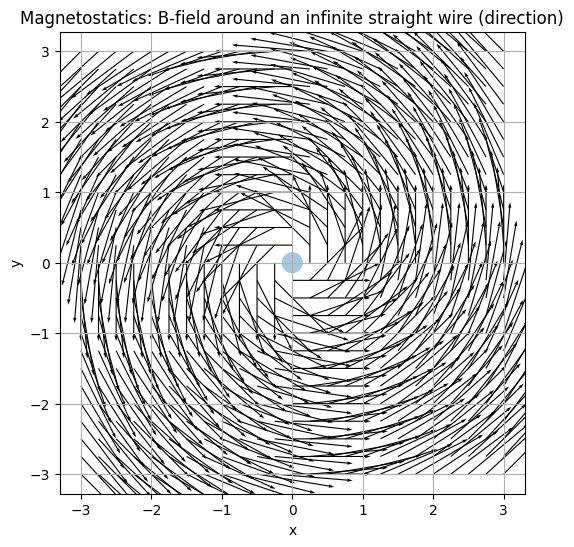

In [6]:
# Magnetic field of an infinite straight wire along z-axis, current I>0
# In the xy-plane: B is tangential, magnitude ~ 1/r
I = 1.0
xq = np.linspace(-3, 3, 25)
yq = np.linspace(-3, 3, 25)
Xq, Yq = np.meshgrid(xq, yq)
r2 = Xq*Xq + Yq*Yq
r = np.sqrt(r2)
eps = 1e-6

# Direction: phi-hat = (-y/r, x/r); magnitude ~ 1/r
Bx = (-Yq / (r + eps)) / (r + eps)
By = ( Xq / (r + eps)) / (r + eps)

# Normalize for direction-only
mag = np.sqrt(Bx*Bx + By*By)
mag[mag == 0] = 1.0
Bx = Bx / mag
By = By / mag

plt.figure(figsize=(6,6))
plt.quiver(Xq, Yq, Bx, By, angles='xy', scale_units='xy', scale=0.9)
circle = plt.Circle((0,0), 0.15, fill=True, alpha=0.4)
plt.gca().add_patch(circle)
plt.title('Magnetostatics: B-field around an infinite straight wire (direction)')
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal'); plt.grid(True)
plt.show()

### 6) Wave Interference: Two Coherent Sources in 2D

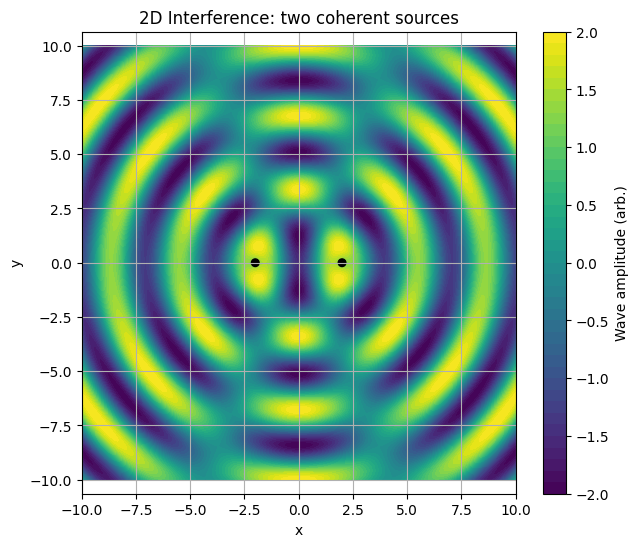

In [7]:
# Two-source interference pattern in 2D: z = sin(k r1) + sin(k r2)
k = 2.0
d = 2.0  # half-spacing between sources at (±d, 0)
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
r1 = np.sqrt((X - d)*(X - d) + Y*Y) + 1e-6
r2 = np.sqrt((X + d)*(X + d) + Y*Y) + 1e-6
Z = np.sin(k*r1) + np.sin(k*r2)

plt.figure(figsize=(7,6))
cf = plt.contourf(X, Y, Z, levels=40)
plt.colorbar(cf, label='Wave amplitude (arb.)')
plt.scatter([d, -d], [0, 0], c=['k','k'], s=30)
plt.title('2D Interference: two coherent sources')
plt.xlabel('x'); plt.ylabel('y'); plt.axis('equal'); plt.grid(True)
plt.show()


---
## Exercises (Physics)
1. **Dipolo 3D**: plote a superfície 3D do potencial do dipolo (limite os valores máximos para evitar singularidades) e compare com o mapa de calor 2D.
2. **Linhas de campo**: para o dipolo, varie a distância `a` e observe como mudam as linhas do campo.
3. **Fio com corrente**: adicione uma dependência radial mais realista para a magnitude de `B` (e.g., ~1/r) e evite singularidades com um raio mínimo.
4. **Interferência**: varie `k` e `d`, identifique franjas de máximo/mínimo e descreva a relação com diferença de caminho.